In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import  recall_score, precision_score, accuracy_score, roc_curve
import graphviz

In [18]:
trainData = np.load('fin_t2_train.npy')
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = np.load('fin_t2_test.npy')
testLabels = open('finalTestLabels.labels', 'r').readlines()

In [3]:
trainData.shape

(69992, 2200)

In [19]:
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])

100%|██████████| 20000/20000 [00:00<00:00, 2244683.85it/s]


In [20]:
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))

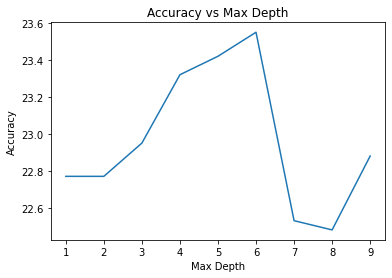

In [9]:
accuracy = []
depth = []
for i in range(1,10,1):
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    depth.append(clf.get_depth())

plt.plot(depth, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

In [26]:
from sklearn.metrics import classification_report

In [ ]:
accuracy = []
depth = []
for i in tqdm(range(1,30,1)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    depth.append(i)

plt.plot(depth, accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

In [23]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels
clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
get_dt_performance(clf, X_test, y_test)

Accuracy:  19.84
Precision:  [13.27 11.95  0.  ]
Recall:  [ 1.29 48.75  0.  ]


In [24]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels
clf = RandomForestClassifier(criterion='gini', random_state=0)
clf.fit(X_train, y_train)
print
get_dt_performance(clf, X_test, y_test)

Accuracy:  24.93
Precision:  [16.08 35.11 22.33]
Recall:  [ 1.58 15.14  2.09]


In [25]:
def get_dt_performance(clf, X_test, y_test, skip_roc=False):
    ## Accuracy, Recall and Precision
    y_pred = clf.predict(X_test)
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
    print("Accuracy: ", accuracy)
    precision = precision_score(y_pred = y_pred, y_true = y_test, average=None)
    precision = np.round(np.multiply(precision, 100), 2)
    print("Precision: ", precision)
    recall = recall_score(y_pred = y_pred, y_true = y_test, average=None)
    recall = np.round(np.multiply(recall, 100), 2)
    print("Recall: ", recall)

In [ ]:
accuracy = []
predVal = []
itr= [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
for i in tqdm(range(len(itr))):
    clf = RandomForestClassifier(algorithm=, random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    predVal.append(itr[i])


plt.plot(predVal, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num estimators')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels
clf = AdaBoostClassifier(algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
print("Accuracy: ", accuracy)
print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Accuracy:  22.78
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       1.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.00      0.00      0.00       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.67      0.52      0.59       565
          

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
X_train, X_test, y_train, y_test = trainData, testData, trainLabels, testLabels
clf = AdaBoostClassifier(algorithm="SAMME.R", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))


              precision    recall  f1-score   support

           1       0.20      0.00      0.00      2022
           2       0.68      0.06      0.12      1955
           3       0.35      0.01      0.01      1099
           4       0.63      0.14      0.23      1246
           5       0.17      0.00      0.00       786
           6       0.45      0.04      0.07       809
           7       0.39      0.05      0.09       928
           8       0.38      0.04      0.07       669
           9       0.00      0.00      0.00       569
          10       0.20      0.00      0.00       595
          11       0.58      0.29      0.38       696
          12       0.41      0.24      0.30       546
          13       0.37      0.01      0.03       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.22      0.02      0.04       492
          17       0.61      0.65      0.63       565
          18       0.29    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
print("Accuracy: ", accuracy)

Accuracy:  26.12


### colab


In [ ]:
accuracy = []
predVal = []
itr= []
for i in tqdm(range(len(itr))):
    clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    predVal.append(itr[i])


plt.plot(predVal, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num estimators')
plt.show()

In [ ]:
accuracy = []
predVal = []
itr= [400, 500, 600, 700, 800, 900, 1000]
for i in tqdm(range(len(itr))):
    clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
    print("Accuracy: ", accuracy)
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    predVal.append(itr[i])


plt.plot(predVal, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num estimators')
plt.show()

In [36]:
from sklearn.naive_bayes import GaussianNB
clf_mnb = GaussianNB()
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
print("Accuracy: ", accuracy)
clf_mnb.fit(X_train, y_train)
y_pred = clf_mnb.predict(X_test)
print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Accuracy:  22.78
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.43      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.37      0.01      0.02      1246
           5       0.00      0.00      0.00       786
           6       0.20      0.00      0.01       809
           7       0.14      0.00      0.00       928
           8       0.06      0.01      0.02       669
           9       0.07      0.04      0.05       569
          10       0.06      0.05      0.05       595
          11       0.10      0.44      0.16       696
          12       0.09      0.46      0.15       546
          13       0.05      0.06      0.06       492
          14       0.00      0.00      0.00       536
          15       0.04      0.68      0.07       498
          16       0.04      0.02      0.03       492
          17       0.17      0.54      0.26       565
          

In [37]:
from sklearn.naive_bayes import BernoulliNB
clf_mnb = BernoulliNB()
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
print("Accuracy: ", accuracy)
clf_mnb.fit(X_train, y_train)
y_pred = clf_mnb.predict(X_test)
print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Accuracy:  7.0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.00      0.00      0.00      1955
           3       0.00      0.00      0.00      1099
           4       0.00      0.00      0.00      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.07      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.52      0.08      0.15       696
          12       0.40      0.03      0.06       546
          13       0.04      0.01      0.01       492
          14       0.00      0.00      0.00       536
          15       0.03      0.97      0.05       498
          16       0.01      0.00      0.00       492
          17       0.69      0.12      0.20       565
          18

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
# .np.todense()
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf_mnb = MultinomialNB()
accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test) * 100,2)
print("Accuracy: ", accuracy)
clf_mnb.fit(X_train.todense(), y_train.todense())
y_pred = clf_mnb.predict(X_test)
print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

Accuracy:  3.32


AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [43]:
accuracy = []
predVal = []
itr= [400, 500, 600, 700, 800, 900, 1000]

for i in tqdm(range(len(itr))):
    clf = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    accuracy = round(accuracy_score(y_pred, y_test) * 100,2)
    print("Accuracy: ", accuracy)
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    # accuracy.append(round(accuracy_score(y_pred,testLabels) * 100,2))
    # predVal.append(predVal, float(itr[i]))


# plt.plot(predVal, accuracy)
# plt.xlabel('Num estimators')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Num estimators')
# plt.show()

  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 14%|█▍        | 1/7 [05:28<32

Classification report for case:  400
Accuracy:  24.02
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.67      0.08      0.15      1955
           3       0.00      0.00      0.00      1099
           4       0.71      0.12      0.21      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.68      0.10      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 29%|██▊       | 2/7 [12:31<31:59, 383.84s/it]

Classification report for case:  500
Accuracy:  23.98
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.67      0.08      0.15      1955
           3       0.00      0.00      0.00      1099
           4       0.70      0.12      0.20      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.70      0.10      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 43%|████▎     | 3/7 [21:03<29:31, 442.76s/it]

Classification report for case:  600
Accuracy:  23.98
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.69      0.08      0.14      1955
           3       0.00      0.00      0.00      1099
           4       0.71      0.12      0.20      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.68      0.09      0.16       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.73    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 57%|█████▋    | 4/7 [33:44<28:24, 568.24s/it]

Classification report for case:  700
Accuracy:  23.96
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.70      0.07      0.13      1955
           3       0.00      0.00      0.00      1099
           4       0.70      0.11      0.20      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.70      0.09      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.73    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 71%|███████▏  | 5/7 [47:07<21:45, 652.95s/it]

Classification report for case:  800
Accuracy:  23.97
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.71      0.07      0.13      1955
           3       0.00      0.00      0.00      1099
           4       0.68      0.12      0.21      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.72      0.10      0.17       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.74    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 86%|████████▌ | 6/7 [1:01:40<12:07, 727.70s/it]

Classification report for case:  900
Accuracy:  23.88
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.71      0.07      0.13      1955
           3       0.00      0.00      0.00      1099
           4       0.69      0.12      0.21      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.70      0.09      0.16       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.72    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 7/7 [1:17:56<00:00, 668.14s/it]

Classification report for case:  1000
Accuracy:  23.83
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2022
           2       0.72      0.07      0.13      1955
           3       0.00      0.00      0.00      1099
           4       0.69      0.12      0.21      1246
           5       0.00      0.00      0.00       786
           6       0.00      0.00      0.00       809
           7       0.00      0.00      0.00       928
           8       0.00      0.00      0.00       669
           9       0.00      0.00      0.00       569
          10       0.00      0.00      0.00       595
          11       0.68      0.09      0.16       696
          12       0.00      0.00      0.00       546
          13       0.00      0.00      0.00       492
          14       0.00      0.00      0.00       536
          15       0.00      0.00      0.00       498
          16       0.00      0.00      0.00       492
          17       0.71   

In [ ]:
accuracy = []
predVal = []
itr= [50, 150, 250, 350, 450, 550]
for i in tqdm(range(len(itr))):
    clf = AdaBoostClassifier(algorithm="SAMME.R",n_estimators=itr[i], random_state=0)
    clf.fit(trainData, trainLabels)
    y_pred = clf.predict(testData)
    print("Classification report for case: ",itr[i])
    print(classification_report(testLabels,y_pred,labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))
    accuracy.append(round(accuracy_score(y_pred = y_pred, y_true = testLabels) * 100,2))
    predVal.append(itr[i])


plt.plot(predVal, accuracy)
plt.xlabel('Num estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num estimators')
plt.show()